In [3]:
import os
import sys
import re
import pdb
import time

import numpy as np
import scipy as sp
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

print('pwd', os.getcwd())
print('np ', np.__version__)
print('sp ', sp.__version__)
print('tf ', tf.__version__)

/home/mratkovic/.local/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('pwd', '/home/mratkovic/deeplearning/DU1')
('np ', '1.11.2')
('sp ', '0.18.1')
('tf ', '0.10.0')


In [4]:
import data
import fcann2

In [5]:
import time

class Timer(object):
    def __init__(self, label='', verbose=False):
        self.verbose = verbose
        self.label = label

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.duration = self.end - self.start
        if self.verbose:
            print('%s: elapsed time: %f s' % (self.label, self.duration))

## Demo data module

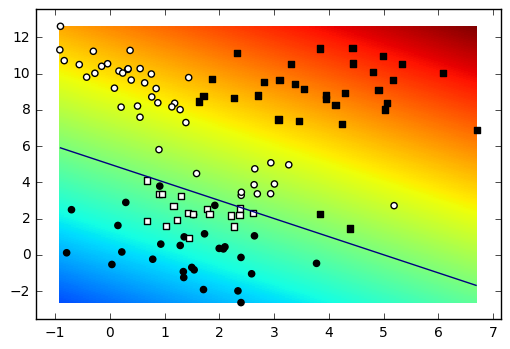

In [6]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

np.random.seed(42)

X,Y_ = data.sample_gmm_2d(K=4, C=2, N=30)
Y = myDummyDecision(X)>0

bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, bbox, offset=0)
data.graph_data(X, Y_, Y)
plt.show()

## Demo fcann2

iteration 0: loss 412.76712309
iteration 1000: loss 60.5397659478
iteration 2000: loss 37.633989979
iteration 3000: loss 24.3091205864
iteration 4000: loss 15.7589264336
iteration 5000: loss 14.7160663982
iteration 6000: loss 13.473415947
iteration 7000: loss 12.8313861213
iteration 8000: loss 12.1482170599
iteration 9000: loss 11.6101606767


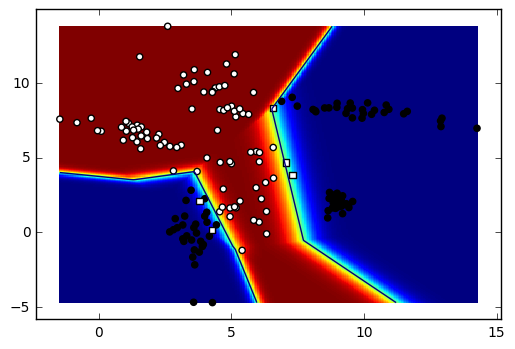

(0.97222222222222221, 0.94444444444444442, 1.0)
0.998937307426


In [7]:
np.random.seed(100)

X,Y_ = data.sample_gmm_2d(K=6, C=2, N=30)
nn = fcann2.fcann2(H=5)
nn.fcann2_train(X, Y_, 10000, 0.1, True, 1000)

dec_fun = lambda X: nn.fcann2_classify(X)[:, 1] 
probs = dec_fun(X)

Y = probs > 0.5
bbox=(np.min(X, axis=0), np.max(X, axis=0))


data.graph_surface(dec_fun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()


# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision)
print(AP)

iteration 0: loss 518.425528104
iteration 1000: loss 15.9759824146
iteration 2000: loss 13.7889010668
iteration 3000: loss 13.3596420891
iteration 4000: loss 14.2807960397
iteration 5000: loss 13.4058462322
iteration 6000: loss 13.0815980168
iteration 7000: loss 12.8713356668
iteration 8000: loss 12.6273553441
iteration 9000: loss 11.1240848625


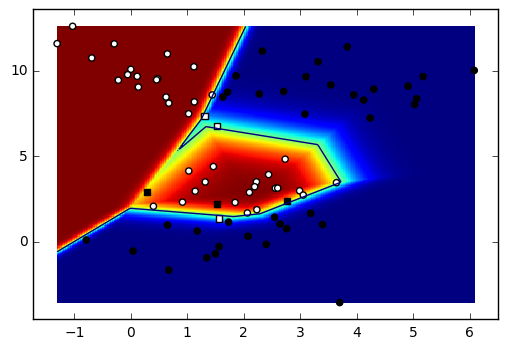

In [8]:
np.random.seed(42)

X,Y_ = data.sample_gmm_2d(K=4, C=2, N=20)
nn = fcann2.fcann2(H=5)
nn.fcann2_train(X, Y_, 10000, 0.1, True, 1000)
dec_fun = lambda X: nn.fcann2_classify(X)[:, 1] 
Y = dec_fun(X) > 0.5

bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(dec_fun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()



## Demo tf lin reg

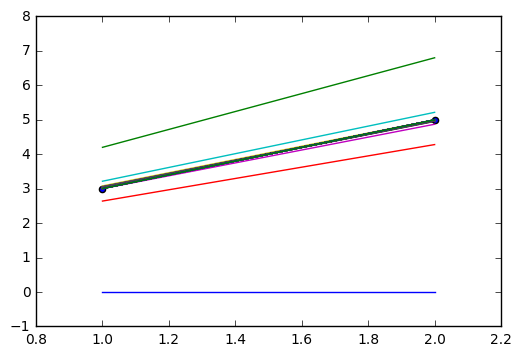

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


X  = tf.placeholder(tf.float32, [None])
Y_ = tf.placeholder(tf.float32, [None])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# afini regresijski model
Y = a * X + b

# kvadratni gubitak
loss = (Y-Y_)**2

# optimizacijski postupak: gradijentni spust
trainer = tf.train.GradientDescentOptimizer(0.1)
train_op = trainer.minimize(loss)
# same as
grads_and_vars = trainer.compute_gradients(loss, [a, b])
optimize = trainer.apply_gradients(grads_and_vars)

## 2. inicijalizacija parametara
sess = tf.Session()
sess.run(tf.initialize_all_variables())

## 3. učenje
X_data = np.array([1,2])
Y_data = np.array([3,5])
plt.scatter(X_data, Y_data, marker='o')
for i in range(100):
    val_loss, _, val_a,val_b = sess.run([loss, train_op, a,b], 
                                  feed_dict={X: X_data, Y_: Y_data})
    plt.plot(X_data, val_a*X_data + val_b, '-')
    #print(i,val_loss, val_a,val_b)
    


(0.30620781, 0.019183306, 18.179642)
[[-30.62078094   0.        ]
 [ -1.91833067   0.        ]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.96205133, 1.8611816, 0.63852799)
[[-0.03641278  0.96168721]
 [-1.10831797  1.85009849]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.98525536, 2.5674589, 0.092796296)
[[-0.01381689  0.9851172 ]
 [-0.42050275  2.56325388]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.99405915, 2.8354249, 0.014238687)
[[-0.00524114  0.99400675]
 [-0.15954144  2.8338294 ]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.99739939, 2.9370933, 0.0029303585)
[[ -1.98844634e-03   9.97379482e-01]
 [ -6.05306029e-02   2.93648791e+00]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.99866664, 2.975666, 0.0013025682)
[[ -7.55311921e-04   9.98659074e-01]
 [ -2.29660682e-02   2.97543645e+00]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.99914747, 2.9903018, 0.001068232)
[[ -2.85794958e-04   9.99144614e-01]
 [ -8.71274620e-03   2.99021482e+00]]
(array([[-0.]], dtype=float32), -0.0)
()
(0.99

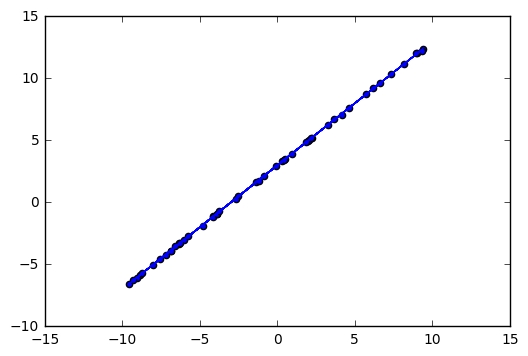

In [10]:
from numpy.random import normal
from scipy import stats as stats
import tensorflow as tf


f = lambda x: x + 3

np.random.seed(42)
Xs = np.random.uniform(-10, 10, 50)
Ys = f(Xs) + normal(0, 5e-2, len(Xs))
Xs, Ys = Xs.reshape(-1, 1), Ys.reshape(-1, 1)
n_samples = len(Xs)


X  = tf.placeholder(tf.float32, [None, 1])
Y_ = tf.placeholder(tf.float32, [None, 1])
a = tf.Variable(0.0)
b = tf.Variable(0.0)


Y = a*X + b
loss  = (1./(2*n_samples)) * (Y-Y_)**2 
#tf.reduce_sum(tf.pow(Y - Y_, 2))/(2*n_samples)


trainer = tf.train.GradientDescentOptimizer(0.01)
train_op = trainer.minimize(loss)
grads_and_vars = trainer.compute_gradients(loss, [a, b])
optimize = trainer.apply_gradients(grads_and_vars)
grads_and_vars = tf.Print(grads_and_vars, [grads_and_vars], 'Status:')

grad_a = (1/n_samples) * tf.matmul(Y-Y_,  X, transpose_a=True)
grad_b = (1/n_samples) * tf.reduce_sum(Y-Y_)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.scatter(Xs, Ys, marker='o')

    for i in range(1000):
        val_loss, val_grads, da, db = sess.run([loss, grads_and_vars, grad_a, grad_b], feed_dict={X: Xs, Y_: Ys})
        sess.run(train_op, feed_dict={X: Xs, Y_: Ys})
        val_a, val_b= sess.run([a, b], feed_dict={X: Xs, Y_: Ys})
        
        if i% 100 == 0: 
            print(val_a, val_b, val_loss.sum())
            print(val_grads)
            print(da, db)
            print()

    plt.plot(Xs, val_a*Xs + val_b, '-')

## 4. Logistička regresija u Tensorflowu

0	2.38473081589
100	0.482453644276
200	0.457605183125
300	0.439922094345
400	0.427181839943
500	0.417927980423
600	0.41113448143
700	0.406088769436
800	0.402297019958
900	0.399415314198
[[22  2  5]
 [ 0 31  0]
 [ 0  0 40]]
[0.28718054152175598, 0.65281514086530534, nan]


data.py:152: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


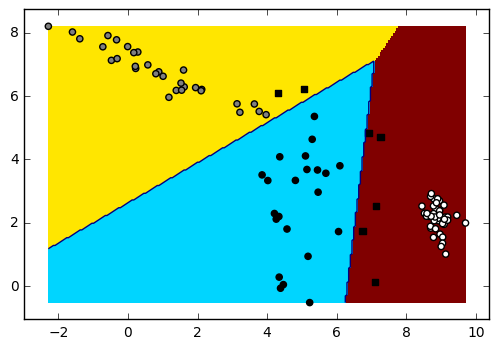

In [11]:
from tf_logreg import TFLogreg

tf.reset_default_graph() 
np.random.seed(100)
tf.set_random_seed(100)

C = 3
n = 100
X, Y_, Yoh_ = data.sample_gauss_2d(C, n, one_hot=True)


tflr = TFLogreg(X.shape[1], Yoh_.shape[1], 0.1, 0.25)
tflr.train(X, Yoh_, 1000)

probs = tflr.eval(X)
Y = probs.argmax(axis=1)
decfun = lambda x: tflr.eval(x).argmax(axis=1)


# eval
mat, classes = data.confusion_mat(y_pred=Y, y_true=Y_)
APs = data.eval_AP_multi(Y_=Y_, probs=probs)
print(mat)
print(APs)

# plot
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()

0	9.68103599548
100	0.348422139883
200	0.196620434523
300	0.195568397641
400	0.140189439058
500	0.119724027812
600	0.177531033754
700	0.113156765699
800	0.105265960097
900	0.114085905254
1000	0.101285159588
1100	0.0972067117691
1200	0.0941484346986
1300	0.0913010165095
1400	0.088645607233
1500	0.0859557241201
1600	0.0832197144628
1700	0.0824237763882
1800	0.0815723985434
1900	0.079746723175
2000	0.0793368890882
2100	0.0783431306481
2200	0.0782858878374
2300	0.0765383690596
2400	0.0749398097396
2500	0.0715377926826
2600	0.0691426098347
2700	0.0664535611868
2800	0.0638366565108
2900	0.0610630400479
3000	0.0597599446774
3100	0.0583346262574
3200	0.056689877063
3300	0.0547218956053
3400	0.0525290071964
3500	0.0494977124035
3600	0.0470498949289
3700	0.0449704714119
3800	0.0434044413269
3900	0.0421234257519
4000	0.0407886244357
4100	0.0398013517261
4200	0.0385982766747
4300	0.037524741143
4400	0.0363196134567
4500	0.0353947803378
4600	0.0351458527148
4700	0.0345169231296
4800	0.0341367945075

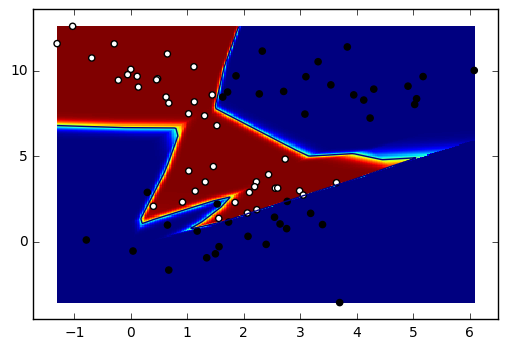

(1.0, 1.0, 1.0)
1.0


In [12]:
from tf_deep import TFDeep

tf.reset_default_graph()
np.random.seed(42)
tf.set_random_seed(100)


X,Y_, Yoh_ = data.sample_gmm_2d(K=4, C=2, N=20, one_hot=True)


config = [X.shape[1], 10, 10, Yoh_.shape[1]]
nn = TFDeep(config, 0.1)
nn.train(X, Yoh_, 10000)

dec_fun = lambda X: nn.eval(X)[:, 1] 
probs = dec_fun(X)

Y = probs > 0.5
bbox=(np.min(X, axis=0), np.max(X, axis=0))


data.graph_surface(dec_fun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()


# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision)
print(AP)

In [288]:
summary_writer = tf.train.SummaryWriter('/home/marko/Projects/DU/logs', nn.session.graph)


In [13]:
def count_params():
    total = 0
    for var in tf.trainable_variables():
        shape = var.get_shape()
        var_params = int(np.prod(shape))
        print('{}; shape: {}; total: {}'.format(var.name, shape, var_params))
        total += var_params
    print('Total:', total)

count_params()

W0:0; shape: (10, 2); total: 20
b0:0; shape: (10,); total: 10
W1:0; shape: (10, 10); total: 100
b1:0; shape: (10,); total: 10
W2:0; shape: (2, 10); total: 20
b2:0; shape: (2,); total: 2
('Total:', 162)


(0, [2, 2], 'relu')
(1, [2, 10, 2], 'relu')
(2, [2, 10, 10, 2], 'relu')
(3, [2, 2], 'sigmoid')
(4, [2, 10, 2], 'sigmoid')
(5, [2, 10, 10, 2], 'sigmoid')


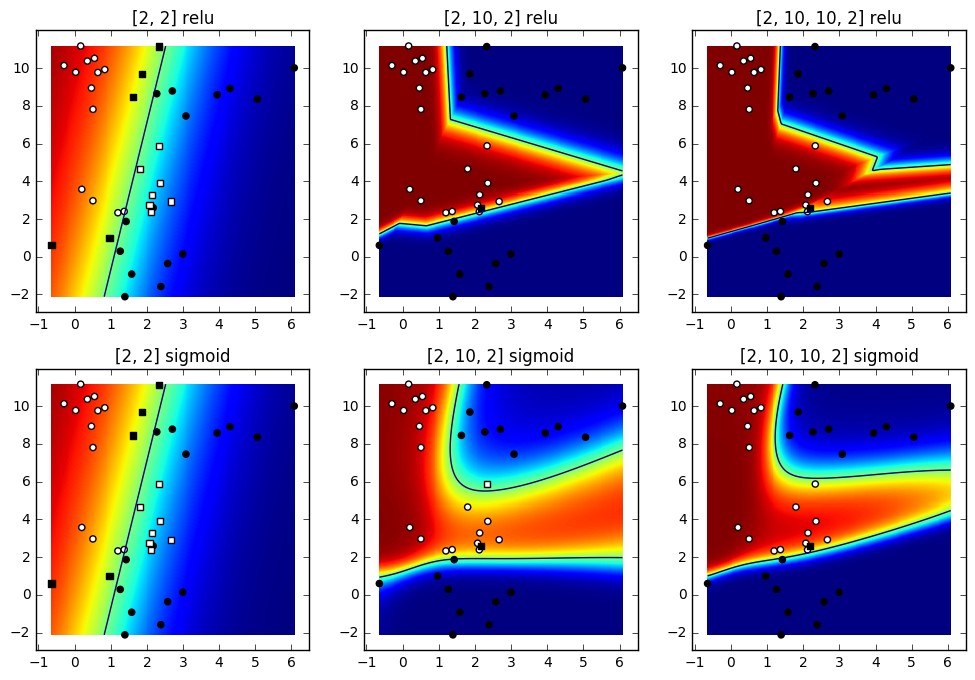

In [14]:
from itertools import product

def plt_problem(X, Y_, Y, decfun, title):
    plt.title(title)
    bbox=(np.min(X, axis=0), np.max(X, axis=0))
    data.graph_surface(decfun, bbox, offset=0.5)
    data.graph_data(X, Y_, Y)

def use_fixed_seed():
    tf.reset_default_graph()
    tf.set_random_seed(130)
    np.random.seed(42)
    
Ks = [4, 6]; Cs = [2, 2]; Ns = [40, 10]
Ks = [4]; Cs = [2]; Ns = [10]
confs = [[2,2], [2,10,2], [2, 10, 10, 2]]
activations = [tf.nn.relu, tf.nn.sigmoid]
params = [Ks,Cs,Ns,confs,activations]


plt.figure(figsize=(12,8))
for i, (activ, K, C, N, conf) in enumerate(product(activations,Ks,Cs,Ns,confs)):
    print(i, conf, activ.__name__)
    use_fixed_seed()

    X, Y_, Yoh_ = data.sample_gmm_2d(K, C, N, one_hot=True)
    

    nn = TFDeep(conf, 0.05, 1e-6, activ)
    nn.train(X, Yoh_, 4000, verbose=False)

    probs = nn.eval(X)
    Y = probs.argmax(axis=1)

    plt.subplot(2, 3, i+1)
    plt_problem(X, Y_, Y, lambda x: nn.eval(x)[:,1], '%s %s' % (conf, activ.__name__))


plt.show()



## SVM

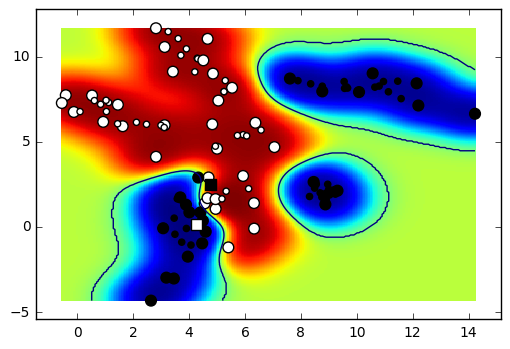

In [16]:
from ksvm_wrap import SVMWrapper

np.random.seed(100)

C = 2
n = 10
X, Y_, Yoh_ = data.sample_gmm_2d(6, 2, 20, one_hot=True)


model = SVMWrapper(X, Y_, c=1, g='auto')
decfun = lambda x: model.get_scores(x)[:,1]
probs = model.get_scores(X)
Y = probs.argmax(axis=1)


bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y, model.support())
plt.show()


# MNIST

In [17]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.app.flags.DEFINE_string('data_dir', '~/tmp/data/', 'Directory for storing data')
mnist = input_data.read_data_sets(tf.app.flags.FLAGS.data_dir, one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ~/tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ~/tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ~/tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ~/tmp/data/t10k-labels-idx1-ubyte.gz


(55000, 784, 10)
(784,)


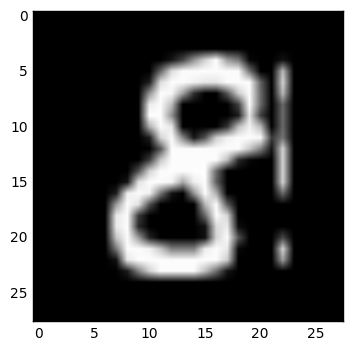

In [18]:
# examine data
N=mnist.train.images.shape[0]
D=mnist.train.images.shape[1]
C=mnist.train.labels.shape[1]
print(N, D, C)
print(mnist.train.images[0].shape)
plt.imshow(mnist.train.images[9].reshape(28,28), cmap='gray')

In [20]:
tf.reset_default_graph()
X, Yoh_ = mnist.train.images, mnist.train.labels

config = [X.shape[1], Yoh_.shape[1]]
nn = TFDeep(config, 0.5, 1e-8)
nn.train(X, Yoh_, 4000)

# dohvati vjerojatnosti na skupu za učenje



0	12.706319809


KeyboardInterrupt: 

In [8]:
Ys = nn.eval(mnist.test.images)

NameError: name 'nn' is not defined

In [21]:
(Ys.argmax(1) == mnist.test.labels.argmax(1)).sum()/len(Ys)

0.46589999999999998

In [21]:
def plt_problem(X, Y_, Y, decfun, title):
    plt.title(title)
    bbox=(np.min(X, axis=0), np.max(X, axis=0))
    data.graph_surface(decfun, bbox, offset=0.5)
    data.graph_data(X, Y_, Y)

def use_fixed_seed():
    tf.reset_default_graph()
    tf.set_random_seed(130)
    np.random.seed(42)

In [72]:
epsilon = 1e-3
    
def batch_norm(inputs, decay = 0.999):
    scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]))
    beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]))
    
    pop_mean = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), trainable=False)
    pop_var = tf.Variable(tf.ones([inputs.get_shape()[-1]]), trainable=False)

    
    def f_train():
        batch_mean, batch_var = tf.nn.moments(inputs,[0])
        train_mean = tf.assign(pop_mean, pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var, pop_var * decay + batch_var * (1 - decay))
        
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs, batch_mean, batch_var, beta, scale, epsilon)
    
    def f_test():
        return tf.nn.batch_normalization(inputs, pop_mean, pop_var, beta, scale, epsilon)
    
    return tf.cond(self.is_training, f_train, f_test)

class TFDeep:
    
    def __init__(self, config, param_delta, param_lambda=1e-4, activation=tf.nn.relu):
        D = config[0]; C = config[-1]
        n_layers = len(config[1:])

        # data
        self.X  = tf.placeholder(tf.float32, [None, D])
        self.Yoh_ = tf.placeholder(tf.float32, [None, C])
        self.is_training = tf.placeholder(tf.bool)
        
        batch_norm_activation = lambda x: activation(batch_norm(x))
        activations = [batch_norm_activation] * (n_layers-1) + [tf.nn.softmax]
        self.Ws = []; self.bs = []

        reg_loss = 0
        prev_out = self.X
        for i, (prev, next) in enumerate(zip(config, config[1:])):
            W = tf.Variable(tf.random_normal([next, prev]), name='W%s' % i)
            b = tf.Variable(tf.random_normal([next]), name='b%s' % i)

            self.Ws.append(W); self.bs.append(b)
            reg_loss += tf.nn.l2_loss(W)
            
            s = tf.add(tf.matmul(prev_out, W, transpose_b=True), b)
                     
            prev_out = activations[i](s)

            

        # output
        self.probs = prev_out
        err_loss = tf.reduce_mean(-tf.reduce_sum(self.Yoh_ * tf.log(self.probs+1e-10), 1))
        self.loss = err_loss + param_lambda * reg_loss

        self.train_step = tf.train.GradientDescentOptimizer(param_delta).minimize(self.loss)
        
        self.session = tf.Session()
        self.saver = tf.train.Saver()



    def train(self, X, Yoh_, param_niter, verbose=True):
        self.session.run(tf.initialize_all_variables())
        data_dict = {self.X: X, self.Yoh_: Yoh_, self.is_training:True}

        for i in range(param_niter):
            start_time = time.time()
            val_loss, _ = self.session.run([self.loss, self.train_step], feed_dict=data_dict)
            duration = time.time() - start_time
            if verbose and i % 100 == 0: print("{}\t{}\t{}".format(i, val_loss, duration));

    def _shuffle(self, X, Yoh_):
        perm = np.random.permutation(len(X))
        return X[perm], Yoh_[perm]
        
    def _split_dataset(self, X, Yoh_, ratio=0.8):
        X, Yoh_ = self._shuffle(X, Yoh_)
        split = int(ratio * len(X))
        return X[:split], X[split:], Yoh_[:split], Yoh_[split:],
    
    def batch_train(self, X, Yoh_, n_epochs=1000, batch_size=50, train_ratio=1, print_step=100):
        self.session.run(tf.initialize_all_variables())
        prev_loss = window_loss = float('inf'); 
        
        X_train, X_val, Y_train, Y_val = self._split_dataset(X, Yoh_, ratio=train_ratio)
        n_samples = len(X_train)
        n_batches = int(n_samples/batch_size)
        
        for epoch in range(n_epochs):
            X_train, Y_train = self._shuffle(X_train, Y_train)
            i = 0; avg_loss = 0
            
            while i < n_samples:
                batch_X, batch_Yoh_ = X_train[i:i+batch_size], Y_train[i:i+batch_size]
                data_dict = {self.X: batch_X, self.Yoh_: batch_Yoh_, self.is_training:True}
                val_loss, _ = self.session.run([self.loss, self.train_step], feed_dict=data_dict)
                
                avg_loss += val_loss / n_batches
                i += batch_size
            
            
            
            # validation
            data_dict = {self.X: X_val, self.Yoh_: Y_val, self.is_training:False}
            val_loss, _ = self.session.run([self.loss, self.train_step], feed_dict=data_dict)
            window_loss = min(window_loss, val_loss)
            if epoch % 50 == 0:
                if window_loss > prev_loss:
                    print("Early stopping: epoch", epoch)
                    #break
                prev_loss = window_loss
                window_loss = float('inf')
            
            if epoch % print_step == 0:
                print("Epoch: {:4d}; avg_train_loss {:.9f}; validation_loss {:.9f}".format(epoch, avg_loss, val_loss))
    
        print("Optimization Finished!")
        print("Validation loss {:.9f}".format(val_loss))
                
    def eval(self, X):
        probs =  self.session.run(self.probs, {self.X: X, self.is_training: False})
        return probs
    
    def get_weights(self):
        return self.session.run(self.Ws)
    
    def save(path):
        save_path = self.saver.save(self.session, path)
        print("Model saved in file: %s" % save_path)
        
    def restore(path):
        selfsaver.restore(sess, path)
        print("Model restored.")



In [73]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
tf.reset_default_graph()
X, Yoh_ = mnist.train.images, mnist.train.labels

confs = [[784, 10]]#, [784, 100, 10]]
params = [confs]


plt.figure(figsize=(12,8))
with tf.device('/gpu:0'):
    for i, conf in enumerate(confs):
        print(i, conf)
        use_fixed_seed()

        nn = TFDeep(conf, 0.1, 1e-4)

        global_step = tf.Variable(0, trainable=False)
        learning_rate = tf.train.exponential_decay(0.1, global_step, 100, 0.98, staircase=True)
        nn.train_step = tf.train.AdamOptimizer(learning_rate).minimize(nn.loss, global_step=global_step)

        with Timer(label='train', verbose=True):
            nn.batch_train(X, Yoh_, n_epochs=1000, batch_size=50, train_ratio=0.8, print_step=10)
            #nn.train(X, Yoh_, 1000)

        probs = nn.eval(X)
        Y = probs.argmax(axis=1)


(0, [784, 10])
Epoch:    0; avg_train_loss 1.555387625; validation_loss 1.457940817
Epoch:   10; avg_train_loss 0.389142288; validation_loss 0.378705025
Epoch:   20; avg_train_loss 0.278196291; validation_loss 0.315938503
Epoch:   30; avg_train_loss 0.259369226; validation_loss 0.310573369
Epoch:   40; avg_train_loss 0.255881400; validation_loss 0.308771282
Epoch:   50; avg_train_loss 0.255230283; validation_loss 0.308598220
Epoch:   60; avg_train_loss 0.255102304; validation_loss 0.308592319
Epoch:   70; avg_train_loss 0.255079249; validation_loss 0.308591038
Epoch:   80; avg_train_loss 0.255075446; validation_loss 0.308590680
Epoch:   90; avg_train_loss 0.255074792; validation_loss 0.308590710
('Early stopping: epoch', 100)
Epoch:  100; avg_train_loss 0.255074745; validation_loss 0.308590710
Epoch:  110; avg_train_loss 0.255074745; validation_loss 0.308590770
Epoch:  120; avg_train_loss 0.255074745; validation_loss 0.308590740
Epoch:  130; avg_train_loss 0.255074745; validation_loss 

KeyboardInterrupt: 

0.9253


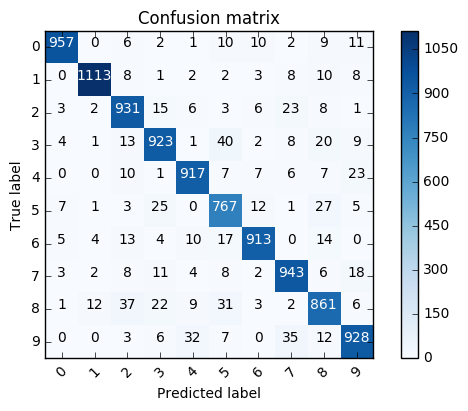

In [78]:
# evaluate accuracy on test set
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn.eval(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y, Y_))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y, Y_)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0, 10))

('Prob', 1.1458629245453267e-07)
('Correct label', 9)


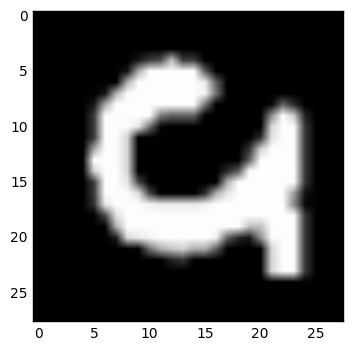

In [79]:
correct_probs = np.sum(probs * mnist.test.labels, axis=1)
worst_sample = correct_probs.argmin()
plt.imshow(mnist.test.images[worst_sample].reshape(28,28), cmap='gray')

print("Prob", correct_probs[worst_sample])
print("Correct label", mnist.test.labels[worst_sample].argmax())

In [80]:
Ws = nn.get_weights()
len(Ws)

1

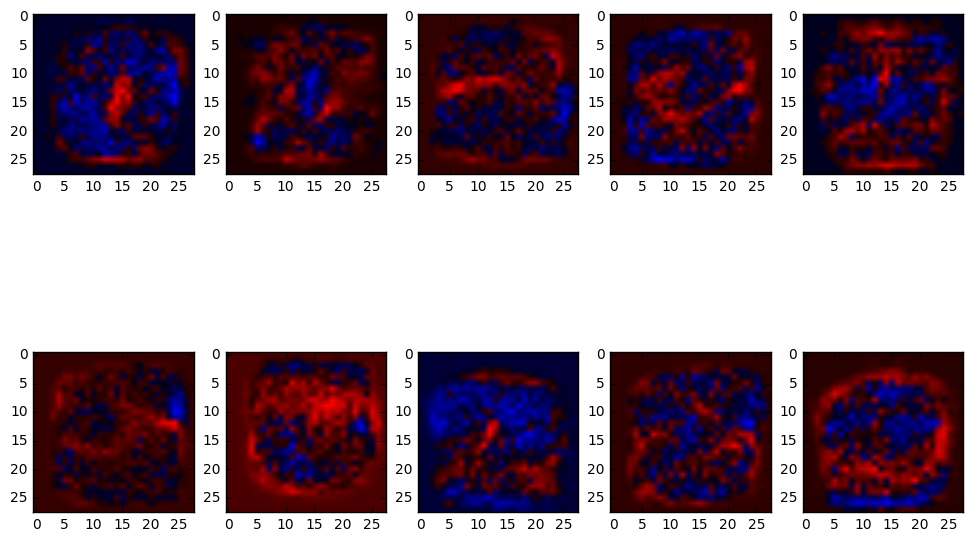

In [81]:
from matplotlib.colors import LinearSegmentedColormap

W = Ws[0]

#cmap
cdict = {'blue':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'red':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }
cmap = LinearSegmentedColormap('BlueRed1', cdict)

plt.figure(figsize=(12,8))
for i, row in enumerate(W):
    plt.subplot(2, 5, i+1)
    
    plt.imshow(row.reshape(28,28),cmap=cmap)
    
plt.show()

In [9]:
# SVM
from ksvm_wrap import SVMWrapper
np.random.seed(100)
X, Yoh_ = mnist.train.images, mnist.train.labels
Y_ = Yoh_.argmax(axis=1)

model = SVMWrapper(X, Y_, c=1, g='auto')


In [10]:
# evaluate accuracy on test set
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = model.predict(X)
Y = probs.argmax(axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_)

KeyboardInterrupt: 

In [ ]:
import pickle
s = pickle.dumps(model)